In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv("c:/data/wine/wine_new.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality  class  
0      9.0        3      0  
1      8.4        3      0  

In [21]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

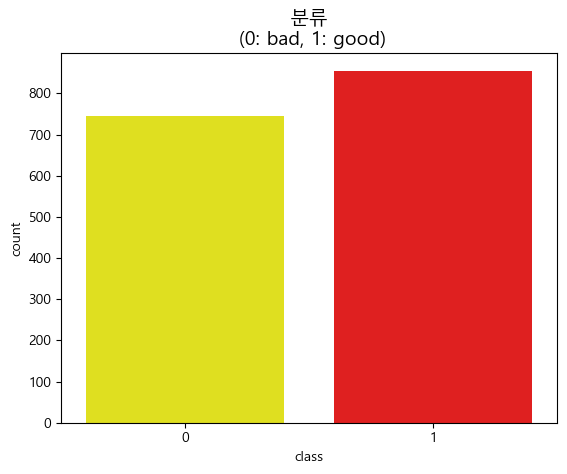

In [4]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('class', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [43]:
train_cols = df.columns[0:11] #0~10 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df["quality"]
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

In [44]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['quality'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["quality"].value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

In [45]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['quality'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["quality"].value_counts()

3    681
4    681
5    681
6    681
7    681
8    681
Name: quality, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.6051602814698983
검증용: 0.571875


c:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[ 0,  2,  3,  0,  0,  0],
       [ 0,  0,  6,  6,  0,  0],
       [ 0,  0, 98, 34,  0,  0],
       [ 0,  0, 40, 80,  6,  0],
       [ 0,  0,  2, 32,  5,  0],
       [ 0,  0,  0,  3,  3,  0]], dtype=int64)

##### CLASS ######

In [28]:
train_cols = df.columns[0:11] #0~10 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df["class"]
print(df[train_cols].head())
print(y.head())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34

In [29]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    744
1    744
Name: class, dtype: int64

In [30]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    855
1    855
Name: class, dtype: int64

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

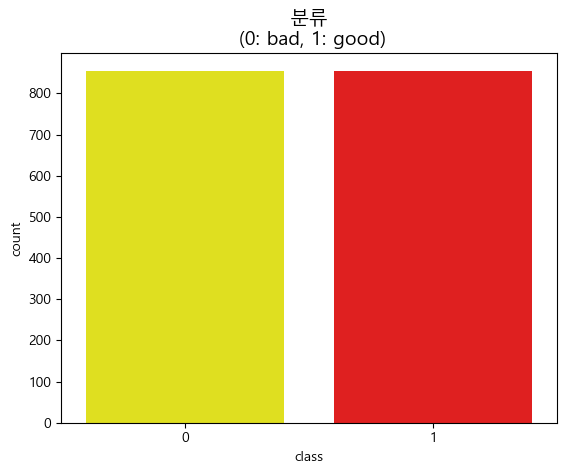

In [11]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('class', data=df2, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [12]:
train_cols = df.columns[0:11] #0~10 필드
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [35]:
import statsmodels.api as sm
model=sm.Logit(y,X) #0,1이진분류
#model=sm.MNLogit(y,X) #다분류
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.250      
Dependent Variable:  class             AIC:               1677.9172  
Date:                2023-04-03 12:06  BIC:               1737.0656  
No. Observations:    1599              Log-Likelihood:    -827.96    
Df Model:            10                LL-Null:           -1104.5    
Df Residuals:        1588              LLR p-value:       1.9883e-112
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.0952   0.0632  1.5075 0.1317  -0.0286  0.2190
volatile acidity

* 모델의 설명력 25.0%
* 유의하지 않은 변수들: fixed acidity,residual sugar,pH
* 상관관계 : density(-) > chlorides(-) > volatile acidity(-) > sulphates(+)
* 도수 > 염화물 > 휘발성 산도 > 황산염

In [33]:
import statsmodels.api as sm
#model=sm.Logit(y,X) #0,1이진분류
model=sm.MNLogit(y,X) #다분류
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.517798
         Iterations 6
                          Results: MNLogit
Model:               MNLogit           Pseudo R-squared:  0.250      
Dependent Variable:  class             AIC:               1677.9172  
Date:                2023-04-03 12:03  BIC:               1737.0656  
No. Observations:    1599              Log-Likelihood:    -827.96    
Df Model:            10                LL-Null:           -1104.5    
Df Residuals:        1588              LLR p-value:       1.9883e-112
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
     class = 0        Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------
       fixed acidity  0.0952   0.0632  1.5075 0.1317  -0.0286  0.2190
    volatile ac

In [15]:
#pvalue가 0.05보다 큰 값들을 제거
cols=['volatile acidity', 'citric acid', 'chlorides',
'free sulfur dioxide','total sulfur dioxide', 'density',
'sulphates', 'alcohol']
X=X_samp[cols]
y=y_samp['class']
df2=pd.concat([X,y],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.7521501172791243
검증용: 0.75625


In [40]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[110,  39],
       [ 39, 132]], dtype=int64)

In [19]:
df_cm=pd.DataFrame(cm, index=[0, 1],
                    columns=[0, 1])
df_cm

,0,1
0,139,34
1,58,111


<AxesSubplot:title={'center':'Confusion Matrix'}>

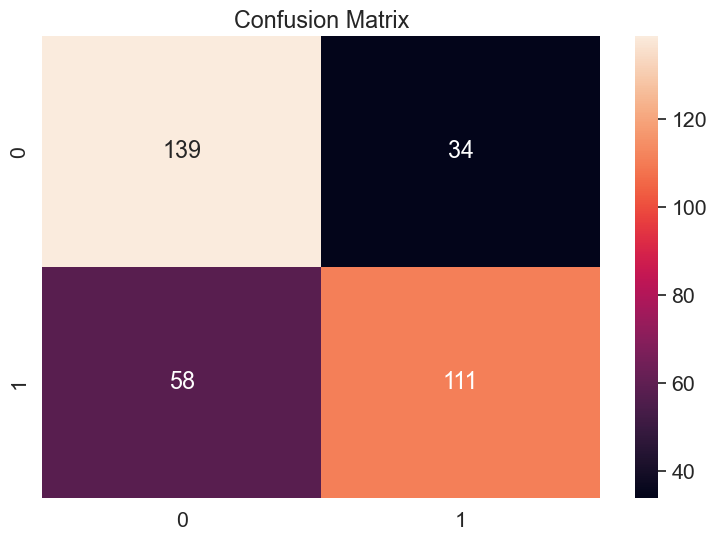

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자